In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
adv_df = pd.read_csv('/advertisement_data.csv')

In [2]:
adv_df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,0,68.95,35,61833.90,256.09,0,0
1,1,80.23,31,68441.85,193.77,1,0
2,2,69.47,26,59785.94,236.50,0,0
3,3,74.15,29,54806.18,245.89,1,0
4,4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...,...
995,995,72.97,30,71384.57,208.58,1,1
996,996,51.30,45,67782.17,134.42,1,1
997,997,51.63,51,42415.72,120.37,1,1
998,998,55.55,19,41920.79,187.95,0,0


In [3]:
# Set target variable and remove unnecessary columns
targets = adv_df['Clicked on Ad']
data = adv_df.drop(labels=['Unnamed: 0', 'Clicked on Ad'], axis = 1)

In [4]:
print(data, targets)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns] 0      0
1      0
2      0
3      0
4      0
      ..
995    1


In [5]:
# train data : test data == 8:2
train_data, test_data = data[:800], data[800:]
train_targets, test_targets = targets[:800], targets[800:]

In [6]:
print(train_data, train_targets)
print(train_data.describe())

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
795                     75.64   29     69718.19                204.82     1
796                     79.22   27     63429.18                198.79     1
797                     77.05   34     65756.36                236.08     0
798                     66.83   46     77871.75                196.17     1
799                     76.20   24     47258.59                228.81     1

[800 rows x 5 columns] 0      0
1      0
2      0
3      0
4      0
      ..
795    0
7

In [7]:
print(test_data, test_targets)
print(test_data.describe())

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
800                     56.64   29     55984.89                123.24     1
801                     53.33   34     44275.13                111.63     1
802                     50.63   50     25767.16                142.23     0
803                     41.84   49     37605.11                139.32     0
804                     53.92   41     25739.09                125.46     1
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[200 rows x 5 columns] 800    1
801    1
802    1
803    1
804    1
      ..
995    1
9

# **Logistic regression implementation using Scikit-Learn library**

In [8]:
# Logistic regression module from sklearn
from sklearn.linear_model import LogisticRegression

In [9]:
# Training the classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_data, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Prediction on test data
from sklearn import metrics

pred_targets = classifier.predict(test_data)
print(metrics.classification_report(test_targets, pred_targets))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.97      0.88      0.93       112

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200



In [11]:
# Cross validation with number of folds = 5
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000)
cv_accuracy = cross_val_score(clf, train_data, train_targets, cv=5, scoring='accuracy')
print('Cross validation accuracy: {}'.format(cv_accuracy))
cv_f1score = cross_val_score(clf, train_data, train_targets, cv=5, scoring='f1_macro')
print('Cross validation F1 scores: {}'.format(cv_f1score))

Cross validation accuracy: [0.9875  0.86875 0.89375 0.95    0.88125]
Cross validation F1 scores: [0.9874824  0.8668727  0.89354624 0.94996873 0.88068606]


# **Logistic regression implementation from scratch without any libraries**

In [12]:
# Define the sigmoid function
def sigmoid(h):
    return 1/(1 + np.exp(-h))

In [13]:
# Cross entropy loss (log loss) for two-class classification problem
def compute_loss(true_targets, pred_probs):
    return -np.log(1-pred_probs) * (1-true_targets) - np.log(pred_probs) * true_targets

In [14]:
# Cosntruct the hypothesis to be fed into the sigmoid function (w0x0 + w1x1 + ..... + wNxN)
def construct_hypothesis(parameters, data):
    return np.sum(np.multiply(parameters, data), axis=1)

In [15]:
# Batch gradient descent step to update the parameters
def gradient_descent(parameters, lr, train_data, h, mask):
    for i in range(len(parameters)):
        parameters[i] = parameters[i] - lr * np.mean((mask * train_data[:, i])/(1 + np.exp(-mask * h)))/len(h)

In [16]:
# Scale continuous features to avoid out of range values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

if type(train_data) is not np.ndarray:
    train_data = train_data.to_numpy()
    train_targets = train_targets.to_numpy()
    train_data = np.concatenate((scaler.fit_transform(train_data[:,:-1]), train_data[:,-1].reshape(train_data[:,-1].shape[0], 1)), axis=1)

# Initialize parameters randomly
parameters = np.random.rand(train_data.shape[1])
num_train_examples = train_data.shape[0]
# Number of iterations to train
train_iterations = 30000
# Learning rate
lr = 0.5
print('Initial parameters = {}'.format(parameters))

Initial parameters = [0.9214794  0.35646544 0.7585172  0.73729907 0.86403288]


In [17]:
# Plot to visualize the loss as a function of number of iterations
def plot_curve(losses):
    plt.figure(figsize=(8,8))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs. #Iterations')
    plt.grid()
    plt.show()

In [18]:
# Main training loop
losses = []
for itr in range(train_iterations):
    # Get hypothesis as a linear combination of parameters and features
    h = construct_hypothesis(parameters, train_data)
    # Get probabilites as predicted by the model
    pred_probs = sigmoid(h)
    # Compute log loss
    loss = compute_loss(train_targets, pred_probs)
    print('Loss: {}'.format(np.mean(loss)))
    losses.append(np.mean(loss))
    # Mask to take care of sign
    mask = np.ones(num_train_examples, dtype=int)
    mask = mask - 2 * train_targets
    # Update parameters
    gradient_descent(parameters, lr, train_data, h, mask)

Streaming output truncated to the last 5000 lines.
Loss: 0.13551763495536742
Loss: 0.1355157283438604
Loss: 0.13551382190388442
Loss: 0.13551191563541715
Loss: 0.13551000953843623
Loss: 0.13550810361291935
Loss: 0.1355061978588441
Loss: 0.1355042922761882
Loss: 0.13550238686492933
Loss: 0.13550048162504505
Loss: 0.13549857655651318
Loss: 0.13549667165931129
Loss: 0.13549476693341708
Loss: 0.13549286237880828
Loss: 0.13549095799546254
Loss: 0.13548905378335754
Loss: 0.135487149742471
Loss: 0.13548524587278066
Loss: 0.13548334217426414
Loss: 0.13548143864689918
Loss: 0.1354795352906635
Loss: 0.13547763210553482
Loss: 0.13547572909149086
Loss: 0.13547382624850932
Loss: 0.1354719235765679
Loss: 0.13547002107564443
Loss: 0.13546811874571657
Loss: 0.13546621658676203
Loss: 0.13546431459875863
Loss: 0.13546241278168403
Loss: 0.13546051113551605
Loss: 0.13545860966023243
Loss: 0.1354567083558109
Loss: 0.13545480722222925
Loss: 0.1354529062594652
Loss: 0.13545100546749658
Loss: 0.13544910484630

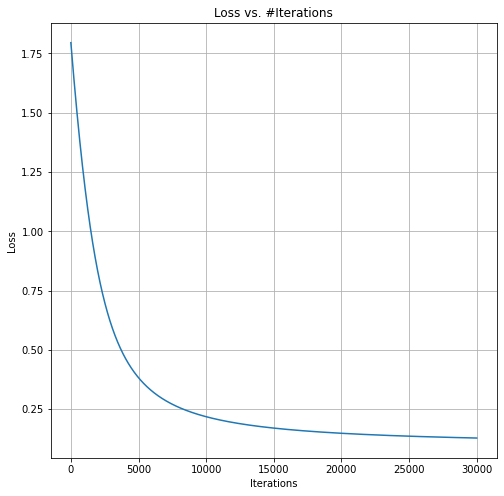

In [19]:
# Visualization
plot_curve(losses)

In [20]:
print('Parameters after training = {}'.format(parameters))

Parameters after training = [-1.36007359  0.88101112 -0.80244253 -1.53744647  0.31405546]


In [21]:
# Scale the test data accordingly
if type(test_data) is not np.ndarray:
    test_data = test_data.to_numpy()
    test_targets = test_targets.to_numpy()
    test_data = np.concatenate((scaler.fit_transform(test_data[:,:-1]), test_data[:,-1].reshape(test_data[:,-1].shape[0], 1)), axis=1)

In [22]:
test_targets

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1])

In [23]:
# Probabilities predicted by the trained logistic regression model
pred_probs = sigmoid(construct_hypothesis(parameters, test_data))

In [24]:
pred_probs

array([0.8343984 , 0.97140245, 0.99477419, 0.9946569 , 0.99265987,
       0.05230643, 0.88078214, 0.98732134, 0.98489244, 0.97673185,
       0.91722402, 0.02313337, 0.08220559, 0.02244499, 0.02144479,
       0.03102217, 0.97797831, 0.69532176, 0.01917472, 0.04870322,
       0.96331794, 0.01411836, 0.02648633, 0.02620901, 0.0202652 ,
       0.03639734, 0.02026748, 0.98912608, 0.88563233, 0.97706503,
       0.90475613, 0.95600759, 0.98625971, 0.95959645, 0.01851232,
       0.0397115 , 0.98745849, 0.98159052, 0.99343285, 0.98604079,
       0.80634613, 0.98440795, 0.02940524, 0.03139891, 0.04940854,
       0.96482441, 0.98727944, 0.09148668, 0.03806496, 0.987228  ,
       0.0241684 , 0.96735974, 0.98938129, 0.03084479, 0.05744101,
       0.19856041, 0.0196967 , 0.0287604 , 0.98973058, 0.04754094,
       0.21758189, 0.02310451, 0.08903794, 0.02853544, 0.11973745,
       0.97810235, 0.03934887, 0.05676395, 0.02761107, 0.01855296,
       0.54719834, 0.0138254 , 0.03726783, 0.02057809, 0.08686

In [25]:
# Accuracy = (Number of examples correctly classified/Total number of examples) * 100
# Used 0.5 as the classification threshold
print('\033[1m Accuracy of the Logistic regression model implemented from scratch on test data = {} %'.format(np.mean(np.around(pred_probs) == test_targets) * 100))

 Accuracy of the Logistic regression model implemented from scratch on test data = 95.0 %
